In [19]:
import pandas as pd
df = pd.read_csv("./FPData2.csv")

df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [20]:
#renaming columns
df.columns = ['Country', 'year', 'ladder', 'gdp', 'support', 'life_expec', 'freedom', 'generosity','corruption','positive', 'negative']
df.head()

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [21]:
#grouping by country to see number of years that each country has data reported
df.groupby('Country').count()

,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
Country,,,,,,,,,,
Afghanistan,14,14,13,14,14,14,13,14,14,14
Albania,15,15,15,15,15,15,15,15,15,15
Algeria,10,10,10,9,10,8,8,8,9,9
Angola,4,4,4,4,4,4,4,4,4,4
Argentina,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...
Venezuela,17,17,14,17,17,17,13,17,17,17
Vietnam,17,17,17,16,17,14,16,13,15,16
Yemen,12,12,12,12,12,12,12,9,12,12


In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df.isnull().sum()

Country         0
year            0
ladder          0
gdp            20
support        13
life_expec     54
freedom        33
generosity     73
corruption    116
positive       24
negative       16
dtype: int64

In [24]:
#identifying number of data entries for each year
df.groupby('year').size()

year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    141
2013    136
2014    144
2015    142
2016    141
2017    147
2018    141
2019    143
2020    116
2021    122
2022    114
dtype: int64

In [25]:
#just to see for visual purposes, a map of each countries ladder score in 2014, with colors
#representing differences in ladder scores
import plotly.express as px
df14 = df.loc[(df.year == 2014)]
df14.head()


,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
6,Afghanistan,2014,3.131,7.671,0.526,52.30,0.509,0.106,0.871,0.492,0.375
20,Albania,2014,4.814,9.358,0.626,68.72,0.735,-0.026,0.883,0.573,0.335
32,Algeria,2014,6.355,9.355,0.818,65.90,NaN,NaN,NaN,0.558,0.177
42,Angola,2014,3.795,9.010,0.755,53.08,0.375,-0.170,0.834,0.595,0.368
51,Argentina,2014,6.671,10.067,0.918,66.78,0.745,-0.168,0.854,0.769,0.238


In [52]:
fig = px.choropleth(df14,
                    locationmode='country names',
                    locations='Country',
                    color='ladder',
                    title='Countries by Ladder Score'
                   )
fig.show()

In [54]:
#seeing the means for each year for all variables
df_means = df.groupby(['year']).mean()
df_means

<ipython-input-54-6d045b364254>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
year,,,,,,,,,
2005,6.446259,10.124222,0.897407,66.825926,0.829520,0.248000,0.715880,0.671962,0.255769
2006,5.196899,9.065330,0.835809,60.097273,0.730477,0.002272,0.755747,0.660807,0.254614
2007,5.418275,9.190079,0.807770,61.562743,0.687337,0.009604,0.792133,0.652293,0.250216
2008,5.418509,9.180427,0.784391,61.151435,0.688355,0.017560,0.764121,0.652853,0.243545
2009,5.457667,9.273894,0.819071,62.514523,0.687402,-0.009071,0.763387,0.643416,0.246982
2010,5.496806,9.406309,0.831867,62.911983,0.708262,-0.000659,0.757235,0.646733,0.240675
2011,5.424082,9.304883,0.802800,61.972340,0.732186,-0.018785,0.755203,0.636952,0.248822
2012,5.443617,9.410057,0.808624,63.018235,0.711371,-0.006451,0.757214,0.641418,0.259241
2013,5.393294,9.384713,0.806096,63.126165,0.727548,-0.004075,0.763868,0.654657,0.269956


In [55]:
#dropping 2005, due to only 27 countries reporting that year
df_means = df_means.drop([2005])



Text(0.5, 1.0, 'Negative Affect')

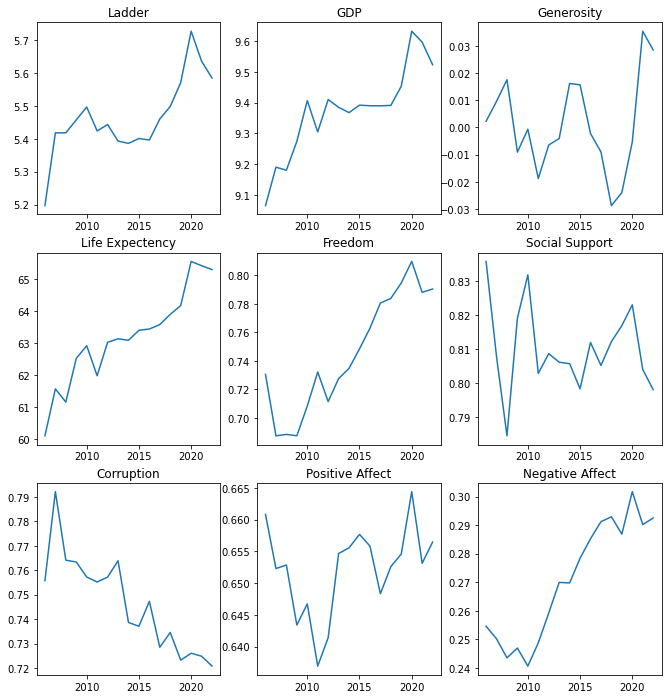

In [56]:
x_labels = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
#Plotting the means for each year
fig, axs = plt.subplots(3, 3, figsize=(11.2,12))
axs[0, 0].plot(x_labels, df_means['ladder'])
axs[0, 0].set_title('Ladder')

axs[0, 1].plot(x_labels, df_means['gdp'])
axs[0, 1].set_title('GDP')
axs[0, 2].plot(x_labels, df_means['generosity'])
axs[0, 2].set_title('Generosity')
axs[1, 0].plot(x_labels, df_means['life_expec'])
axs[1, 0].set_title('Life Expectency')
axs[1, 1].plot(x_labels, df_means['freedom'])
axs[1, 1].set_title('Freedom')
axs[1, 2].plot(x_labels, df_means['support'])
axs[1, 2].set_title('Social Support')
axs[2, 0].plot(x_labels, df_means['corruption'])
axs[2, 0].set_title('Corruption')
axs[2, 1].plot(x_labels, df_means['positive'])
axs[2, 1].set_title('Positive Affect')
axs[2, 2].plot(x_labels, df_means['negative'])
axs[2, 2].set_title('Negative Affect')

In [48]:
df_country_mean = df.groupby(['Country']).mean().reset_index()
#identifying the mean for each country for all variables
df_country_mean

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative
0,Afghanistan,2014.642857,3.346643,7.585615,0.484500,52.533929,0.498571,0.060000,0.842786,0.433286,0.364357
1,Albania,2014.933333,5.047933,9.396933,0.715800,68.505333,0.683133,-0.074733,0.869600,0.557267,0.293267
2,Algeria,2015.800000,5.377400,9.339800,0.814889,66.080000,0.530875,-0.141000,0.697750,0.535667,0.267222
3,Angola,2012.500000,4.420250,8.985750,0.738250,52.150000,0.456250,-0.090500,0.866750,0.625750,0.351250
4,Argentina,2014.000000,6.283588,10.030412,0.902412,66.664706,0.774529,-0.152471,0.838647,0.739000,0.287588
...,...,...,...,...,...,...,...,...,...,...,...
160,Venezuela,2013.882353,5.962059,8.588929,0.903706,64.922353,0.668353,-0.098615,0.797059,0.775118,0.269529
161,Vietnam,2014.000000,5.385353,8.952294,0.826438,64.852941,0.894571,-0.013562,0.779923,0.617467,0.210000
162,Yemen,2013.416667,3.912250,7.925250,0.739833,58.309167,0.622417,-0.120917,0.824667,0.458333,0.293583
163,Zambia,2013.733333,4.453733,8.051533,0.729800,51.535000,0.761867,0.021333,0.828533,0.678867,0.298000


In [51]:
#mapping the mean ladder score for each country
fig = px.choropleth(df_country_mean,
                    locationmode='country names',
                    locations='Country',
                    color='ladder',
                    title='Countries by Mean Ladder Score'
                   )
fig.show()